In [1]:
#importing requried modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
#from google.colab import files
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline


In [2]:
#conda install google.colab

In [3]:
#uploaded = files.upload()
dataset = pd.read_csv('spam.csv')

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#removing unnamed columns
dataset = dataset.drop('Unnamed: 2', 1)
dataset = dataset.drop('Unnamed: 3', 1)
dataset = dataset.drop('Unnamed: 4', 1)

In [6]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset = dataset.rename(columns = {'v1':'label','v2':'message'})


In [8]:
dataset.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
dataset.head(4)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...


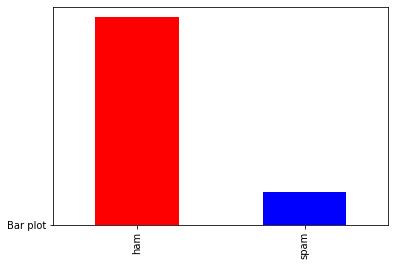

In [10]:
count = pd.value_counts(dataset["label"],sort=True)
count.plot(kind="bar",color=["red","blue"])
plt.plot('Bar plot')
plt.show()

In [11]:
f = feature_extraction.text.CountVectorizer(stop_words ='english')
X = f.fit_transform(dataset["message"])
np.shape(X)

(5572, 8357)

In [12]:
dataset["label"]= dataset["label"].map({"spam":1,"ham":0})
X_train,X_test, y_train, y_test = model_selection.train_test_split(X, dataset['label'], test_size=0.70, random_state=42)

In [13]:
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [14]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998803,0.961548,0.913793,0.819588
1,0.11001,0.998803,0.965650,0.944444,0.824415
2,0.22001,0.999402,0.967444,0.938697,0.837607
3,0.33001,0.999402,0.968470,0.938697,0.843373
4,0.44001,0.999402,0.971289,0.927203,0.867384
5,0.55001,0.998803,0.975904,0.923372,0.899254
6,0.66001,0.998803,0.976673,0.919540,0.907372
7,0.77001,0.997606,0.977698,0.917625,0.915870
8,0.88001,0.997606,0.978211,0.909962,0.925926
9,0.99001,0.997606,0.978211,0.902299,0.932673


In [15]:
#Testing the model
y_pred=bayes.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [16]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index,:]

alpha             10.560010
Train Accuracy     0.977259
Test Accuracy      0.962830
Test Recall        0.722222
Test Precision     1.000000
Name: 96, dtype: float64

In [17]:
#Confusion Matrix for Naive Bayes Classifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix obtained: ")
print(cm)

Confusion Matrix obtained: 
[[3379    0]
 [ 198  324]]


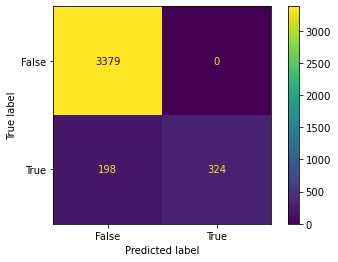

In [18]:
#Displaying the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =[False,True])
cm_display.plot()
plt.show()

In [19]:
#ROC curve for Naive Bayes Classifier
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve For Naive Bayers:",roc_auc)

Area under the curve For Naive Bayers: 0.8103448275862069


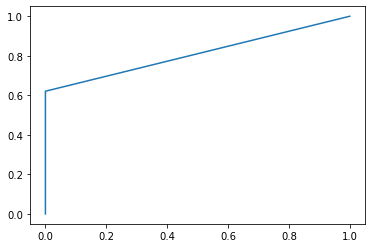

In [20]:
#Displaying the ROC curve 
plt.plot(false_positive_rate,true_positive_rate)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3379
           1       1.00      0.62      0.77       522

    accuracy                           0.95      3901
   macro avg       0.97      0.81      0.87      3901
weighted avg       0.95      0.95      0.94      3901



In [22]:
#Random Forest Method
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [23]:
y_pred = rf_model.predict(X_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label=1, average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))


Precision : 0.984 / Recall : 0.724 / fscore : 0.834 / Accuracy: 0.962


In [24]:
conda install keras

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [25]:
#Using NLP using and TensorFlow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [26]:
vocab_size = 400
oov_tok = "<OOV>"
max_length = 250
embedding_dim = 16
encode = ({'ham': 0, 'spam': 1} )
#new dataset with replaced values
dataset = dataset.replace(encode)

In [27]:
X = dataset['message']
Y = dataset['label']
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
# convert to sequence of integers
X = tokenizer.texts_to_sequences(X)

In [28]:
X = np.array(X)
y = np.array(Y)

<ipython-input-28-67c34fac1eac>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


In [29]:
X = pad_sequences(X, maxlen=max_length)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           6400      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 6,833
Trainable params: 6,833
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 50
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.20, random_state=7)
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test,y_test), verbose=2)

Epoch 1/50
140/140 - 1s - loss: 0.5006 - accuracy: 0.8533 - val_loss: 0.3762 - val_accuracy: 0.8700
Epoch 2/50
140/140 - 0s - loss: 0.3793 - accuracy: 0.8649 - val_loss: 0.3632 - val_accuracy: 0.8700
Epoch 3/50
140/140 - 0s - loss: 0.3644 - accuracy: 0.8649 - val_loss: 0.3469 - val_accuracy: 0.8700
Epoch 4/50
140/140 - 0s - loss: 0.3402 - accuracy: 0.8649 - val_loss: 0.3145 - val_accuracy: 0.8700
Epoch 5/50
140/140 - 1s - loss: 0.2920 - accuracy: 0.8643 - val_loss: 0.2492 - val_accuracy: 0.8673
Epoch 6/50
140/140 - 0s - loss: 0.2178 - accuracy: 0.8963 - val_loss: 0.1786 - val_accuracy: 0.9417
Epoch 7/50
140/140 - 0s - loss: 0.1632 - accuracy: 0.9484 - val_loss: 0.1378 - val_accuracy: 0.9578
Epoch 8/50
140/140 - 0s - loss: 0.1329 - accuracy: 0.9571 - val_loss: 0.1197 - val_accuracy: 0.9623
Epoch 9/50
140/140 - 0s - loss: 0.1159 - accuracy: 0.9637 - val_loss: 0.1002 - val_accuracy: 0.9659
Epoch 10/50
140/140 - 0s - loss: 0.1021 - accuracy: 0.9677 - val_loss: 0.0883 - val_accuracy: 0.9686

In [32]:
results = model.evaluate(X_test, y_test)
loss = results[0]
accuracy = results[1]


print(f"[+] Accuracy: {accuracy*100:.2f}%")

35/35 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9892
[+] Accuracy: 98.92%


In [33]:
from tensorflow.keras.preprocessing import sequence


In [34]:
#Defining the function
def get_predictions(txts):
    txts = tokenizer.texts_to_sequences(txts)
    txts = sequence.pad_sequences(txts, maxlen=max_length)
    preds = model.predict(txts)
    if(preds[0] > 0.5):
        print("SPAM MESSAGE")
        
    else:
        print('NOT SPAM')

In [35]:
txts=["You have won a free ticket to las vegas. Contact now"]
print(get_predictions(txts))
txts=["Hey there call me asap!!"]

print(get_predictions(txts))

SPAM MESSAGE
None
NOT SPAM
None


In [36]:
#SVM Classification
#Creating a SVC model
from sklearn.svm import SVC
svc_model = SVC() #initialize the code module
svc_model.fit(X_train,y_train)

SVC()

In [37]:
#Testing the model
y_pred1 = svc_model.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [38]:
#Confusion Matrix for Support Vector Machine classifier
cm1= confusion_matrix(y_test,y_pred1)
print("Confusion Matrix obtained: ")
print(cm1)

Confusion Matrix obtained: 
[[964   6]
 [102  43]]


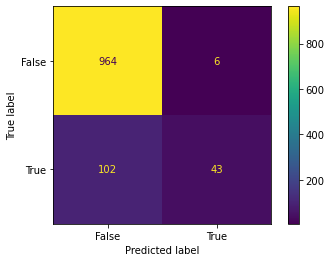

In [39]:
#Displaying the Confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
plt.show()

In [40]:
#Accuracy of SVC
print("Accuracy of SVM model:",metrics.accuracy_score(y_test, y_pred1))

Accuracy of SVM model: 0.9031390134529148


In [41]:
#ROC curve for SVC

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Area under the curve For SVC:",roc_auc)

Area under the curve For SVC: 0.6451830785638109


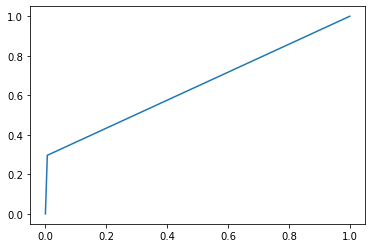

In [42]:
plt.plot(false_positive_rate,true_positive_rate)

In [43]:
#Printing the classification report of SVM classifier model
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       970
           1       0.88      0.30      0.44       145

    accuracy                           0.90      1115
   macro avg       0.89      0.65      0.70      1115
weighted avg       0.90      0.90      0.88      1115

